حسین آقاسی زاده
محمدرضا اسماعیلیان

In [38]:
!gdown --fuzzy https://drive.google.com/file/d/1z68okWEUB72VRivMdLQqJ9Kb21oN9nLu/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1Q-GjvCOaHSUP5hvDc2Iq7Kfm7gG_Kl6v/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1z68okWEUB72VRivMdLQqJ9Kb21oN9nLu
To: /content/train_data.npz
100% 103M/103M [00:02<00:00, 37.1MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Q-GjvCOaHSUP5hvDc2Iq7Kfm7gG_Kl6v
To: /content/test_data.npz
100% 103M/103M [00:01<00:00, 62.4MB/s] 


In [2]:
import numpy as np
from typing import Tuple
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['features'], data['domains'], data['digits']

features_train, domains_train, digits_train = load_data('train_data.npz')
features_test, domains_test, digits_test = load_data('test_data.npz')



0.7476


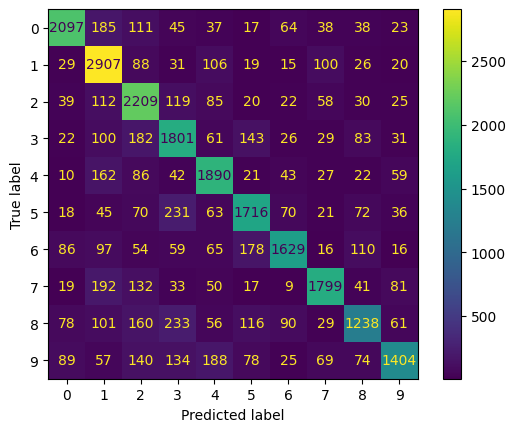

In [3]:
model =  RandomForestClassifier(n_estimators=10,max_depth=10,min_samples_split=2)
model.fit(features_train, digits_train)
predictions = model.predict(features_test)
print(accuracy_score(digits_test, predictions))
confusion_matrix = metrics.confusion_matrix(digits_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

ابتدا پارامتر ها را یک عدد نسبتا منطقی تعریف میکنم سپس سعی میکنیم با تغییر 
پارامتر ها به دقت بالاتری برسیم 


 در شروع کار باید نگاهی به پارامترهای رندم فارست انداخت تا بتوان با تغییرات بهینه در آنها به نتایج مطلوب رسید

> پارامتر اول n_estimator است که هایپرپارامتری است که تعداد درختان مورد استفاده در مدل را تعیین می کند. درخت را می توان به عنوان تقسیمات فرعی نیز فهمید. مقدار پیش فرض این پارامتر 100 است.

> یک درخت بدون شکاف یا گره فرزند ناقص است. max_depth حداکثر تعداد شکاف هایی را که هر درخت می تواند انجام دهد یا به عبارت ساده عمق درخت را تعیین می کند. اگر max_depth خیلی کم باشد، مدل کمتر آموزش می بیند و بایاس بالایی دارد و مدل را به عدم تناسب می رساند. به همین ترتیب، اگر max_depth زیاد باشد، مدل بیش از حد یاد می‌گیرد و منجر به واریانس بالا می‌شود و مدل را به اورفیت شدن سوق می‌دهد.

این دو پارامتر مهمی هستند که ما برای دستیابی به نتایج بهتر از آنها استفاده میکنیم.




0.81936


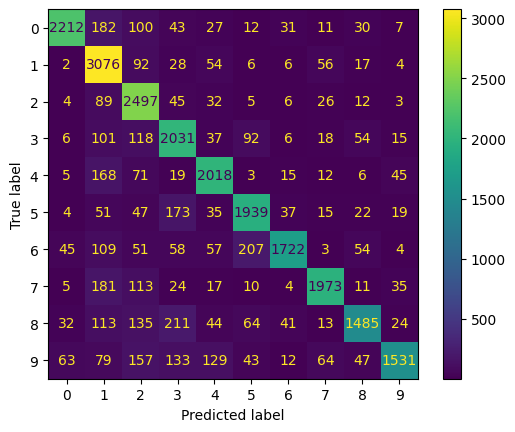

In [4]:
model =  RandomForestClassifier(n_estimators=50,max_depth=10)
model.fit(features_train, digits_train)
predictions = model.predict(features_test)
print(accuracy_score(digits_test, predictions))
confusion_matrix = metrics.confusion_matrix(digits_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

n_estimators:
با زیاد کردن این مقدار تعداد درخت ها افزایش میکند و منطقا دقت بالاتر می رود.

0.82924


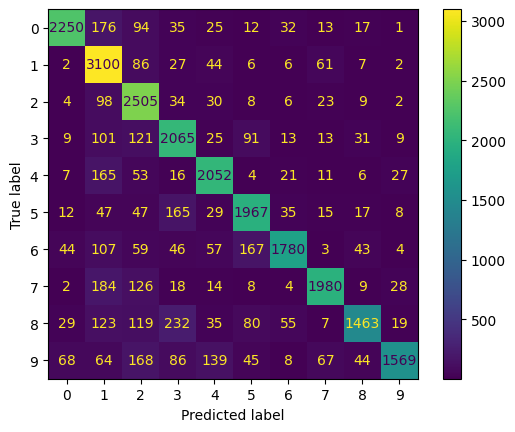

In [5]:
model =  RandomForestClassifier(n_estimators=100,max_depth=10)
model.fit(features_train, digits_train)
predictions = model.predict(features_test)
print(accuracy_score(digits_test, predictions))
confusion_matrix = metrics.confusion_matrix(digits_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

n_estimators
همان طور که قابل مشاهده است زیاد کردن تعداد درخت ها از یه جایی به بعد تاثیری نخواهد داشت پس همین عدد 100 عدد مطلوبی است.

0.86056


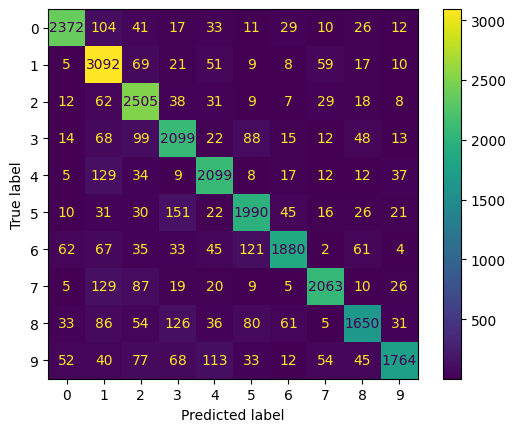

In [6]:
model =  RandomForestClassifier(n_estimators=100,max_depth=20)
model.fit(features_train, digits_train)
predictions = model.predict(features_test)
print(accuracy_score(digits_test, predictions))
confusion_matrix = metrics.confusion_matrix(digits_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

max_depth:
با زیاد کردن حداکثر عمق درخت میتوان به دقت بالاتری رسید البته باید توجه داشت که زیاد کردن بیش از حد این مقدار میتوان باعث اورفیت شدن شود پس به همین مقدار 20 بسنده میکنیم

0.85776


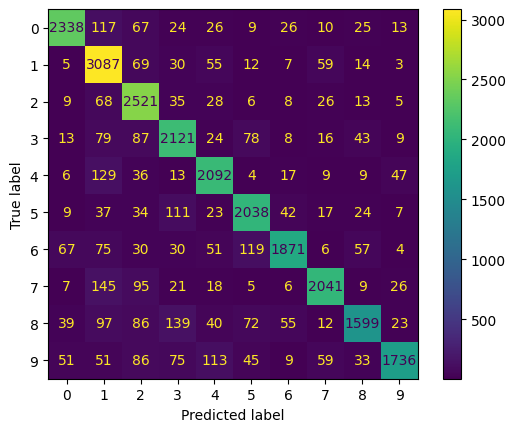

In [7]:
model =  RandomForestClassifier(n_estimators=100,max_depth=20, min_samples_leaf=10,min_samples_split=10)
model.fit(features_train, digits_train)
predictions = model.predict(features_test)
print(accuracy_score(digits_test, predictions))
confusion_matrix = metrics.confusion_matrix(digits_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

min_samples_split , min_samples_leaf:
پارامتر های دیگری نیز موجود است که در این مثال خیلی تاثیر زیادی ندارد و به نظر به دقت مورد نظر رسیدیم و مدل پایین مطلوب ترین مدل برای داده هایمان است

0.86984


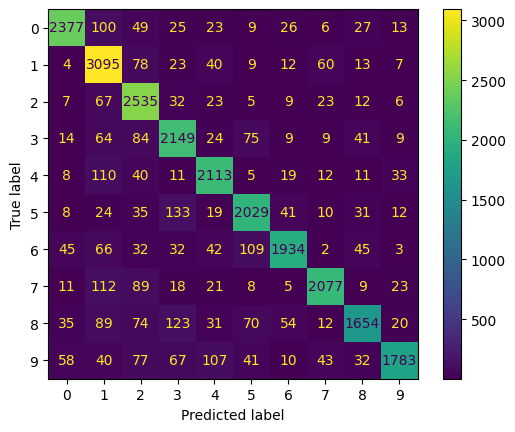

In [8]:
model =  RandomForestClassifier(n_estimators=150,max_depth=25)
model.fit(features_train, digits_train)
predictions = model.predict(features_test)
print(accuracy_score(digits_test, predictions))
confusion_matrix = metrics.confusion_matrix(digits_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()

باید توجه داشت مققادیر بدست آمده برای ساخت این درخت میتوانند بیشتر شوند اما نکته در اینجاست که این افزایش به هیچ عنوان برای داده های تست مناسب نخواهند بود زیرا این کار باعث میشود درخت ما بر داده های آموزشی فیت شده و نتواند تغییرات را بپزیرد.
در مرحله بعد همین اعمال را برای دامین ها انجام می دهیم و سعی میکنیم بهترین پارامترهارا برای آموزش بهتر داده ها در جهت تشخیص دامنه تعیین کنیم.

0.88024


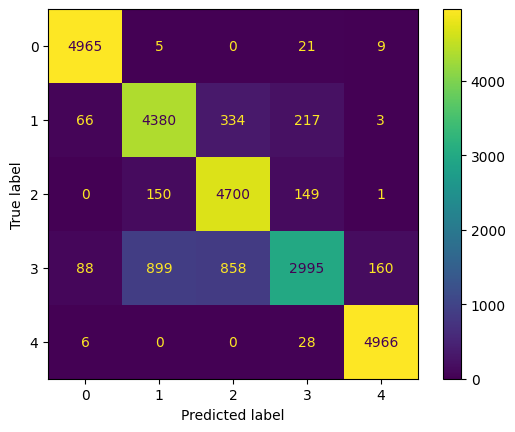

In [9]:
model_domain = RandomForestClassifier(n_estimators=10,max_depth=10)
model_domain.fit(features_train, domains_train)
predictions = model_domain.predict(features_test)
print(accuracy_score(domains_test, predictions))
confusion_matrix = metrics.confusion_matrix(domains_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
cm_display.plot()
plt.show()


0.94672


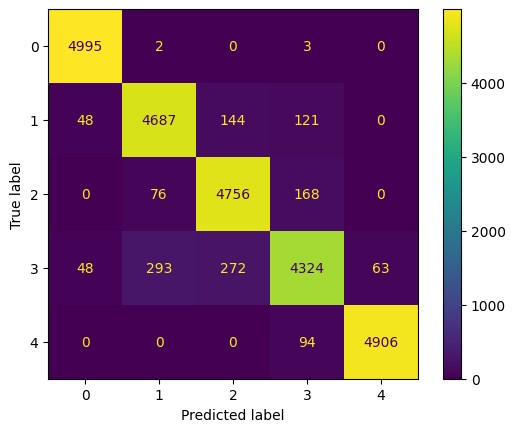

In [10]:
model_domain = RandomForestClassifier(n_estimators=150,max_depth=25)
model_domain.fit(features_train, domains_train)
predictions = model_domain.predict(features_test)
print(accuracy_score(domains_test, predictions))
confusion_matrix = metrics.confusion_matrix(domains_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])
cm_display.plot()
plt.show()

همان طور که میبینیم به مدلی رسیدیم که دامین ها را با دقت بالایی میتواند مشخص کند

In [26]:
features_domain_0 = features_train[domains_train == 0]
features_domain_1 = features_train[domains_train == 1]
features_domain_2 = features_train[domains_train == 2]
features_domain_3 = features_train[domains_train == 3]
features_domain_4 = features_train[domains_train == 4]
digits_domain_0 = digits_train[domains_train == 0]
digits_domain_1 = digits_train[domains_train == 1]
digits_domain_2 = digits_train[domains_train == 2]
digits_domain_3 = digits_train[domains_train == 3]
digits_domain_4 = digits_train[domains_train == 4]

model0 = RandomForestClassifier(n_estimators=150,max_depth=25)
model0.fit(features_domain_0, digits_domain_0)
model1 = RandomForestClassifier(n_estimators=150,max_depth=25)
model1.fit(features_domain_1, digits_domain_1)
model2 = RandomForestClassifier(n_estimators=150,max_depth=25)
model2.fit(features_domain_2, digits_domain_2)
model3 = RandomForestClassifier(n_estimators=150,max_depth=25)
model3.fit(features_domain_3, digits_domain_3)
model4 = RandomForestClassifier(n_estimators=150,max_depth=25)
model4.fit(features_domain_4, digits_domain_4)

RandomForestClassifier(max_depth=25, n_estimators=150)

حال داده های ترین را با توجه به دامینشان جدا کرده و هر دسته را به مدلی جدا برای ترین شدن میدهیم تا بتوانیم اعداد را در دامنه خود تشخیص دهیم. پیش بینی ما این است که وقتی تفاوت های کلی در بین تصاویر مانند پس زمینه تار بودن تصویر و... از تصاویر حذف شود(با دسته بندی تصاویر) بنابراین تشخیص شماره عدد بسیار ساده تر خواهد بود.

In [27]:
features_test_0 = features_test[predictions == 0]
features_test_1 = features_test[predictions == 1]
features_test_2 = features_test[predictions == 2]
features_test_3 = features_test[predictions == 3]
features_test_4 = features_test[predictions == 4]
digits_test_0 = digits_test[predictions == 0]
digits_test_1 = digits_test[predictions == 1]
digits_test_2 = digits_test[predictions == 2]
digits_test_3 = digits_test[predictions == 3]
digits_test_4 = digits_test[predictions == 4]

داده های تست را نیز با توجه به پیشبینی که از دامین هایشان داشتیم به 5 دسته تقسیم میکنیم و رقم ها را با مدل خاص دامین پیشبینی شده ، پیشبینی میکنیم

In [28]:
predictions_domain_0 = model0.predict(features_test_0)
print(accuracy_score(digits_test_0, predictions_domain_0))
predictions_domain_1 = model1.predict(features_test_1)
print(accuracy_score(digits_test_1, predictions_domain_1))
predictions_domain_2 = model2.predict(features_test_2)
print(accuracy_score(digits_test_2, predictions_domain_2))
predictions_domain_3 = model3.predict(features_test_3)
print(accuracy_score(digits_test_3, predictions_domain_3))
predictions_domain_4 = model4.predict(features_test_4)
print(accuracy_score(digits_test_4, predictions_domain_4))

0.9670005892751915
0.8329379201265322
0.7445862335653519
0.837791932059448
0.9826926947071846


دقت بدست آمده را میتوان مشاهده کرد و دید که به جز یک مورد که دقت کاهش یافته در سایر موارد با افزایش بسیار مناسب در دقت تشخیص اعداد هستیم به گونه ای که در دو دامنه ما به دقتی بالاتر از 95 درصد رسیده ایم. 

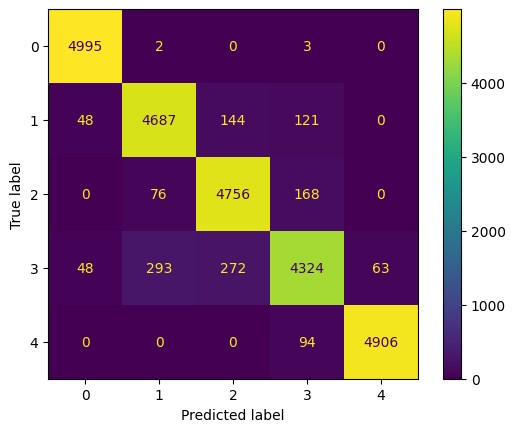

In [29]:
cm_display.plot()
plt.show()

با توجه به این که در هر دامین چقدر از دامین های دیگه به اشتباه حضور دارد از دیگر دامین ها هم در مجموعه ای که میخوایم برای مدل ترین کنیم قرار میدهیم

In [34]:
features_domain_0 = features_train[domains_train == 0]
features_domain_1 = features_train[domains_train == 1]
features_domain_2 = features_train[domains_train == 2]
features_domain_3 = features_train[domains_train == 3]
features_domain_4 = features_train[domains_train == 4]
digits_domain_0 = digits_train[domains_train == 0]
digits_domain_1 = digits_train[domains_train == 1]
digits_domain_2 = digits_train[domains_train == 2]
digits_domain_3 = digits_train[domains_train == 3]
digits_domain_4 = digits_train[domains_train == 4]

rows_01_num = 39
rows_02_num = 0
rows_03_num = 50
rows_04_num = 2
sum0 = rows_01_num + rows_02_num + rows_03_num + rows_04_num
rows_01_weigth = int(rows_01_num / sum0 * 2000)
rows_02_weigth = int(rows_02_num / sum0 * 2000)
rows_03_weigth = int(rows_03_num / sum0 * 2000)
rows_04_weigth = int(rows_04_num / sum0 * 2000)


random_indices_01 = np.random.choice(features_domain_1.shape[0], size=rows_01_weigth, replace=False)
random_rows_01 = features_domain_1[random_indices_01]
random_digits_01 = digits_domain_1[random_indices_01]
random_indices_02 = np.random.choice(features_domain_2.shape[0], size=rows_02_weigth, replace=False)
random_rows_02 = features_domain_2[random_indices_02]
random_digits_02 = digits_domain_2[random_indices_02]
random_indices_03 = np.random.choice(features_domain_3.shape[0], size=rows_03_weigth, replace=False)
random_rows_03 = features_domain_3[random_indices_03]
random_digits_03 = digits_domain_3[random_indices_03]
random_indices_04 = np.random.choice(features_domain_4.shape[0], size=rows_04_weigth, replace=False)
random_rows_04 = features_domain_4[random_indices_04]
random_digits_04 = digits_domain_4[random_indices_04]
features_domain_0_n = np.concatenate((features_domain_0, random_rows_01,random_rows_02,random_rows_03,random_rows_04))
digits_domain_0_n = np.concatenate((digits_domain_0, random_digits_01,random_digits_02,random_digits_03,random_digits_04))
rows_10_num = 3
rows_12_num = 75
rows_13_num = 293
rows_14_num = 0
sum1 = rows_10_num + rows_12_num + rows_13_num + rows_14_num
rows_10_weigth = int(rows_10_num / sum1 * 2000)
rows_12_weigth = int(rows_12_num / sum1 * 2000)
rows_13_weigth = int(rows_13_num / sum1 * 2000)
rows_14_weigth = int(rows_14_num / sum1 * 2000)

random_indices_10 = np.random.choice(features_domain_0.shape[0], size=rows_10_weigth, replace=False)
random_rows_10 = features_domain_0[random_indices_10]
random_digits_10 = digits_domain_0[random_indices_10]
random_indices_12 = np.random.choice(features_domain_2.shape[0], size=rows_12_weigth, replace=False)
random_rows_12 = features_domain_2[random_indices_12]
random_digits_12 = digits_domain_2[random_indices_12]
random_indices_13 = np.random.choice(features_domain_3.shape[0], size=rows_13_weigth, replace=False)
random_rows_13 = features_domain_3[random_indices_13]
random_digits_13 = digits_domain_3[random_indices_13]
random_indices_14 = np.random.choice(features_domain_4.shape[0], size=rows_14_weigth, replace=False)
random_rows_14 = features_domain_4[random_indices_14]
random_digits_14 = digits_domain_4[random_indices_14]
features_domain_1_n = np.concatenate((features_domain_1, random_rows_10,random_rows_12,random_rows_13,random_rows_14))
digits_domain_1_n = np.concatenate((digits_domain_1, random_digits_10,random_digits_12,random_digits_13,random_digits_14))
rows_20_num = 0
rows_21_num = 135
rows_23_num = 258
rows_24_num = 0
sum2 = rows_20_num + rows_21_num + rows_23_num + rows_24_num
rows_20_weigth = int(rows_20_num / sum2 * 2000)
rows_21_weigth = int(rows_21_num / sum2 * 2000)
rows_23_weigth = int(rows_23_num / sum2 * 2000)
rows_24_weigth = int(rows_24_num / sum2 * 2000)

random_indices_20 = np.random.choice(features_domain_0.shape[0], size=rows_20_weigth, replace=False)
random_rows_20 = features_domain_0[random_indices_20]
random_digits_20 = digits_domain_0[random_indices_20]
random_indices_21 = np.random.choice(features_domain_1.shape[0], size=rows_21_weigth, replace=False)
random_rows_21 = features_domain_1[random_indices_21]
random_digits_21 = digits_domain_1[random_indices_21]
random_indices_23 = np.random.choice(features_domain_3.shape[0], size=rows_23_weigth, replace=False)
random_rows_23 = features_domain_3[random_indices_23]
random_digits_23 = digits_domain_3[random_indices_23]
random_indices_24 = np.random.choice(features_domain_4.shape[0], size=rows_24_weigth, replace=False)
random_rows_24 = features_domain_4[random_indices_24]
random_digits_24 = digits_domain_4[random_indices_24]
features_domain_2_n = np.concatenate((features_domain_2, random_rows_20,random_rows_21,random_rows_23,random_rows_24))
digits_domain_2_n = np.concatenate((digits_domain_2, random_digits_20,random_digits_21,random_digits_23,random_digits_24))

rows_30_num = 3
rows_31_num = 151
rows_32_num = 166
rows_34_num = 93
sum3 = rows_30_num + rows_31_num + rows_32_num + rows_34_num
rows_30_weigth = int(rows_30_num / sum3 * 2000)
rows_31_weigth = int(rows_31_num / sum3 * 2000)
rows_32_weigth = int(rows_32_num / sum3 * 2000)
rows_34_weigth = int(rows_34_num / sum3 * 2000)

random_indices_30 = np.random.choice(features_domain_0.shape[0], size=rows_30_weigth, replace=False)
random_rows_30 = features_domain_0[random_indices_30]
random_digits_30 = digits_domain_0[random_indices_30]
random_indices_31 = np.random.choice(features_domain_1.shape[0], size=rows_31_weigth, replace=False)
random_rows_31 = features_domain_1[random_indices_31]
random_digits_31 = digits_domain_1[random_indices_31]
random_indices_32 = np.random.choice(features_domain_2.shape[0], size=rows_32_weigth, replace=False)
random_rows_32 = features_domain_2[random_indices_32]
random_digits_32 = digits_domain_2[random_indices_32]
random_indices_34 = np.random.choice(features_domain_4.shape[0], size=rows_34_weigth, replace=False)
random_rows_34 = features_domain_4[random_indices_34]
random_digits_34 = digits_domain_4[random_indices_34]
features_domain_3_n = np.concatenate((features_domain_3, random_rows_30,random_rows_31,random_rows_32,random_rows_34))
digits_domain_3_n = np.concatenate((digits_domain_3, random_digits_30,random_digits_31,random_digits_32,random_digits_34))

rows_40_num = 0
rows_41_num = 0
rows_42_num = 0
rows_43_num = 61
sum4 = rows_40_num + rows_41_num + rows_42_num + rows_43_num
rows_40_weigth = int(rows_40_num / sum4 * 2000)
rows_41_weigth = int(rows_41_num / sum4 * 2000)
rows_42_weigth = int(rows_42_num / sum4 * 2000)
rows_43_weigth = int(rows_43_num / sum4 * 2000)

random_indices_40 = np.random.choice(features_domain_0.shape[0], size=rows_40_weigth, replace=False)
random_rows_40 = features_domain_0[random_indices_40]
random_digits_40 = digits_domain_0[random_indices_40]
random_indices_41 = np.random.choice(features_domain_1.shape[0], size=rows_41_weigth, replace=False)
random_rows_41 = features_domain_1[random_indices_41]
random_digits_41 = digits_domain_1[random_indices_41]
random_indices_42 = np.random.choice(features_domain_2.shape[0], size=rows_42_weigth, replace=False)
random_rows_42 = features_domain_2[random_indices_42]
random_digits_42 = digits_domain_2[random_indices_42]
random_indices_43 = np.random.choice(features_domain_3.shape[0], size=rows_43_weigth, replace=False)
random_rows_43 = features_domain_3[random_indices_43]
random_digits_43 = digits_domain_3[random_indices_43]
features_domain_4_n = np.concatenate((features_domain_4, random_rows_40,random_rows_41,random_rows_42,random_rows_43))
digits_domain_4_n = np.concatenate((digits_domain_4, random_digits_40,random_digits_41,random_digits_42,random_digits_43))

حال به عنوان مثال برای دامین های 1 از دامین های دیگر هم در مجموعه ترین قرار دارد و حال مدل های جدید را با این مجموعه ها ترین میکنیم

In [36]:
model0n = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_split=2)
model0n.fit(features_domain_0_n, digits_domain_0_n)
model1n = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_split=2)
model1n.fit(features_domain_1_n, digits_domain_1_n)
model2n = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_split=2)
model2n.fit(features_domain_2_n, digits_domain_2_n)
model3n = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_split=2)
model3n.fit(features_domain_3_n, digits_domain_3_n)
model4n = RandomForestClassifier(n_estimators=150,max_depth=25,min_samples_split=2)
model4n.fit(features_domain_4_n, digits_domain_4_n)

RandomForestClassifier(max_depth=25, n_estimators=150)

مدل ها را ترین میکنیم

In [37]:
predictions_domain_0_n = model0n.predict(features_test_0)
print(accuracy_score(digits_test_0, predictions_domain_0_n))
predictions_domain_1_n = model1n.predict(features_test_1)
print(accuracy_score(digits_test_1, predictions_domain_1_n))
predictions_domain_2_n = model2n.predict(features_test_2)
print(accuracy_score(digits_test_2, predictions_domain_2_n))
predictions_domain_3_n = model3n.predict(features_test_3)
print(accuracy_score(digits_test_3, predictions_domain_3_n))
predictions_domain_4_n = model4n.predict(features_test_4)
print(accuracy_score(digits_test_4, predictions_domain_4_n))

0.9685719897858966
0.8418347172795572
0.7490332559938129
0.8341825902335457
0.9851076675387402


حال میتوانیم این دقت ها را با دقت های قبلی مقایسه کنیم تا ببینیم آیا حضور داده های دامین دیگر در دقت به دست آمده مدل هر دامین تاثیر دارد یا خیر